<a href="https://colab.research.google.com/github/rodsei/data-science-ifes/blob/main/CIDA_Trabalho_1_Problema_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Um guia inicial sobre Séries Temporais

---



### Conteúdo

1. [Características](https://colab.research.google.com/drive/1mPpZSGRh9snWz-Sw5yX0bkiirB4yQ4AM#scrollTo=zKClnk4vZghh&line=1&uniqifier=1)
2. [Preparando uma série temporal](https://colab.research.google.com/drive/1mPpZSGRh9snWz-Sw5yX0bkiirB4yQ4AM#scrollTo=hQq-LBMVdtAZ&line=1&uniqifier=1)
3. [Analisando os dados](https://colab.research.google.com/drive/1mPpZSGRh9snWz-Sw5yX0bkiirB4yQ4AM#scrollTo=TI6FHERTximz&line=1&uniqifier=1)
4. [Criando modelos de predição](https://colab.research.google.com/drive/1mPpZSGRh9snWz-Sw5yX0bkiirB4yQ4AM#scrollTo=uo-cWrosK6jo)

### Referência

Aarshay Jain. A Comprehensive Beginner’s Guide to Create a Time Series Forecast (with Codes in Python and R). Fev. de 2016. url: https://www.analyticsvidhya.com/blog/2016/02/ time-series-forecasting-codes-python/ (acesso em 14/07/2021).

# 1. Características


As séries temporais são dados que levam em consideração o momento em que determinado evento ou valor ocorreu. Por isso, em uma série temporal, é importante que os períodos de coleta e análise sejam uniformes, seguindo os mesmos intervalos de tempo.

Todos os eventos ocorrem em uma sequência conhecida e se diferem dos demais problemas de regressão que observam eventos independentes entre eles, com ocorrências isoladas. 

Essas características possibilitam a identificação de tendências sazonais em determinadas janelas de tempo, mas criam a necessidade de se utilizar técnicas especiais para o tratamento e análise dos dados.

## 2. Preparando uma série temporal

## 2.1. Base de dados de exemplo: Air Passengers

In [ ]:
!wget https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv

--2021-08-01 23:23:04--  https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv
Resolving www.analyticsvidhya.com (www.analyticsvidhya.com)... 104.22.54.101, 172.67.38.119, 104.22.55.101, ...
Connecting to www.analyticsvidhya.com (www.analyticsvidhya.com)|104.22.54.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1746 (1.7K) [application/octet-stream]
Saving to: ‘AirPassengers.csv.1’

AirPassengers.csv.1 100%[===================>]   1.71K  --.-KB/s    in 0s      

2021-08-01 23:23:05 (28.4 MB/s) - ‘AirPassengers.csv.1’ saved [1746/1746]



Ao utilizar o Pandas para carregar a base de dados original, o *DataFrame* possui um índice baseado na ordem das linhas, variando de 0 até a última linha presente. No caso da base de exemplo, temos 145 linhas, com índices de 0 a 144.

In [ ]:
import pandas as pd
data = pd.read_csv("AirPassengers.csv")
data.index

RangeIndex(start=0, stop=144, step=1)

## 2.2. Lendo os dados como uma série temporal

Para se utilizar o potencial da base de dados organizada como série temporal, é preciso indexar os períodos como datas para ter o controle da linha temporal. Para isso devem ser feitas algumas transformações, como por exemplo, converter o período disponível em formato de texto para um objeto de data do tipo ***datatime64[ns]*** e utilizar alguns parâmetros específicos na leitura dos dados com o Pandas:

1. **parse_dates**: define quais colunas têm informações de datas e/ou horas.

2. **index_col**: define uma nova forma de indexar os dados, nesse caso utilizando uma variável temporal, com data e/ou hora.

3. **date_parser**: define como as informações serão lidas na base de dados e transformadas em data. Precisa ser utilizado caso os dados não estejam no padrão esperado pelo Pandas ('YYYY-MM-DD HH:MM:SS').

In [ ]:
from datetime import datetime
# Função de formatação dos dados de data
custom_date_parser = lambda x: datetime.strptime(x, '%Y-%m')
# Leitura dos dados indexados pelo período
dataset = pd.read_csv("AirPassengers.csv", parse_dates=["Month"], index_col="Month", date_parser=custom_date_parser)
# Visualizando os dados
dataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
# Verificando o novo índice
dataset.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

## 2.3. Utilizando os índices

Ao aplicar os parâmetros na leitura da base de dados, foi possível verificar o novo índice criado e aqui estão algumas possibilidades que o tipo ***datatime64[ns]*** oferecem no acesso aos dados.

Como poderá ser obaservado nos exemplos, existem alumas particularidades nos índices temporais. A primeira diferença é referente aos acessos de múltiplos índices, em que os limites estão inclusos no resultado retornado. Outra particularidade é a necessidade dos dados estarem com os períodos ordenados, senão a indexação não funcionará corretamente. 

In [ ]:
# Acessando um período específico:
dataset['#Passengers']['1949-01-01']

112

In [ ]:
# Acessando uma janela de tempo, por exemplo, o 1º Semestre de 1950:
dataset['#Passengers']['1950-01-01':'1950-06-01']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
Name: #Passengers, dtype: int64

In [ ]:
# Acessando todos os períodos a partir de 1960:
dataset['#Passengers']['1960-01-01':]

Month
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

In [ ]:
# Acessando todos os períodos anteriores a 1950:
dataset['#Passengers'][:'1949-12-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

Além dos acessos direto ao índice criado, também é possível buscar os valores a partir de perídos maiores, selecionando todos os registros de um mesmo ano, mês, dia, e assim por diante, nessa ordem, da maior unidade para a menor, seguindo o padrão de formatação YYYY-MM-DD HH:MM:SS.

In [ ]:
# Acessando todos os períodos de um ano específico:
dataset['#Passengers']['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [ ]:
# Para facilitar o acesso aos dados, é possível selecionar diretamente a coluna 
# A partir daqui, basta aplicar os índices acima diretamente na nova variável.
passengers = dataset['#Passengers']
passengers.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

# 3. Analisando os dados

Para iniciar a análise de uma série temporal, precisamos conhecer seu comportamento ao longo do tempo, uma vez que suas características influenciam nos próximos passos. Para isso, vamos plotar o gráfico inicial dos dados:

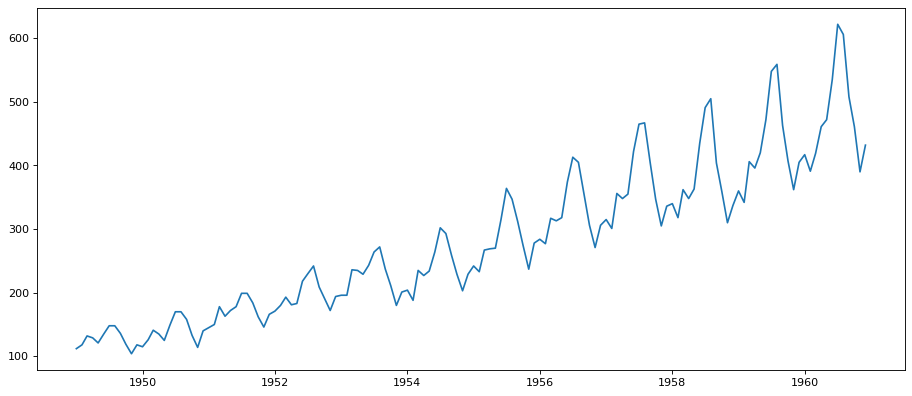

In [ ]:
# Visualizando a evolução dos dados
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(14, 6), dpi=80)
plt.plot(passengers)
plt.show()

Atualmente, as teorias e modelos relacionadas a séries temporais têm a premissa de que a série é estacionária, ou seja, apresentam características estatísticas constantes ao longo do tempo, como média, variância e uma auto co-variância que não depende do tempo.

Além das teorias já serem mais maduras e da maior facilidade de implementação, se as séries temporais estacionárias demonstrarem comportamentos particulares ao longo do tempo, estes têm uma probabilidade muito maior de se repetir no futuro

## 3.1. Verificando se a série é estacionária

Nem sempre é possível identificar as tendências apenas observando os dados. Na base de dados de exemplo, é visível a tendência de crescimento geral no número de passageiros ao longo dos anos e um ciclo de acréscimo em determinados meses de cada ano.

### 3.1.1. Média móvel e variância móvel


Para verificar se a série está em um estado estacionário, podemos utilizar algumas técnicas, como a média móvel ou variância móvel, por exemplo, e observar se ocorre variação ao longo do tempo. Essa também é uma técnica visual.

Tanto a média móvel como a variância móvel são obtidas comparando a média ou variância de um determinado período com períodos anteriores de acordo com uma janela temporal que faça sentido. Na base de dados de exemplo, podemos comparar o período de um mês com os últimos 12 meses por exemplo.

In [ ]:
def verify_rollings_statistics(timeseries):

  #Determing rolling statistics
  rolmean = timeseries.rolling(window=12).mean()
  rolstd = timeseries.rolling(window=12).std()

  #Plot rolling statistics:
  figure(figsize=(14, 6), dpi=80)
  orig = plt.plot(timeseries, color='blue',label='Original')
  mean = plt.plot(rolmean, color='red', label='Rolling Mean')
  std = plt.plot(rolstd, color='black', label = 'Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)

A função acima gera os comparativos de cada mês com os períodos anteriores na janela de tempo definida pelo parâmetro ***window***. Ao fim de cada grupo móvel é calculada a média daquele período.

### 3.1.2. Teste estatístico de *Dickey-Fuller*

Uma outra técnica que pode ser utilizada é o teste ***Dickey-Fuller***, que define uma hipótese nula de que a série temporal não é estacionária. O teste é composto por um teste estatístico e alguns valores críticos para analisar os níveis de confiabilidade. A hipótese nula é rejeitada se o teste estatístico for menor que o valor crítico, e assim, a série temporal poderá ser considerada estacionária.

Na sequência, está definida função que executa o teste ***Dickey-Fuller***.

In [ ]:
from statsmodels.tsa.stattools import adfuller
def run_dickey_fuller_test(timeseries):
  #Perform Dickey-Fuller test:
  print('\nResults of Dickey-Fuller Test:')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
      dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def test_stationarity(timeseries):
  verify_rollings_statistics(timeseries)
  run_dickey_fuller_test(timeseries)    

Acima, foi definida uma função para executar os dois testes e validar de a série é estacionária ou não. Os resultados podem ser observadas a seguir:

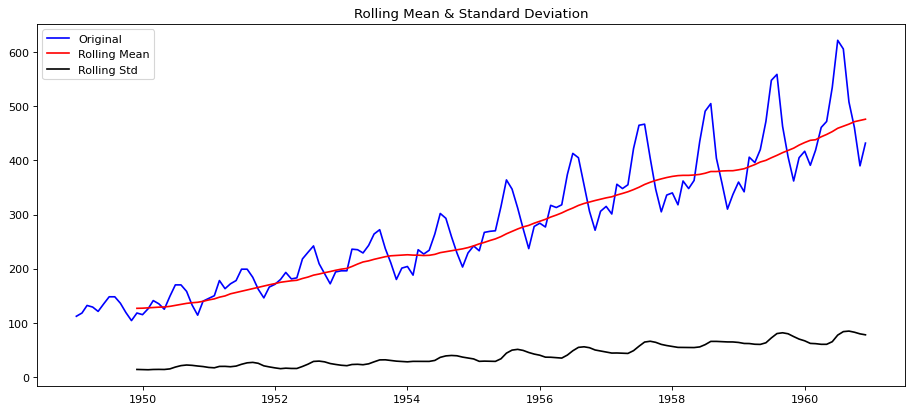


Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
test_stationarity(passengers)

Conforme os resultados demonstraram, a série temporal não é estacionária, com os dois testes apontando o mesmo resultado. A média móvel claramente está aumentando com o tempo, assim como a variância móvel, apesar de ter um incremento menor. Já no teste estatístico de ***Dickey-Fuller***, os valores críticos estão muito abaixo do objetivo para rejeitar a hipótese nula.

## 3.2. Ajustando os dados para uma série estacionária

Para os casos em que temos em mãos uma série não-estacionária, é possível realizar transformações para criar uma série estacionária a partir da série original. As transformações não criam séries totalmente estacionárias, mas as técnicas estatísticas aplicadas chegam o mais próximo possível do cenário ideal.



O que torna uma série não estacionária é a Tendência, ou seja, a média variando ao longo do tempo, e a sazonalidade, que são variações em períodos específicos de tempo. Para se obter uma série estacionária, é preciso identificar esses fatores e removê-los. Algumas técnicas podem ser aplicadas e serão apresentadas a seguir, mas nem sempre elas são adequadas à base de dados. É preciso avaliar qual é a melhor a ser utilizada em cada caso.

### 3.2.1 Estimando e removendo a tendência

Primeiramente, vamos aplicar uma redução da tendência, aplicando uma transformação logarítimica. Uma vez que a tendência é positiva, a função logarítimica irá penalizar mais os valores mais altos do que os valores menores.

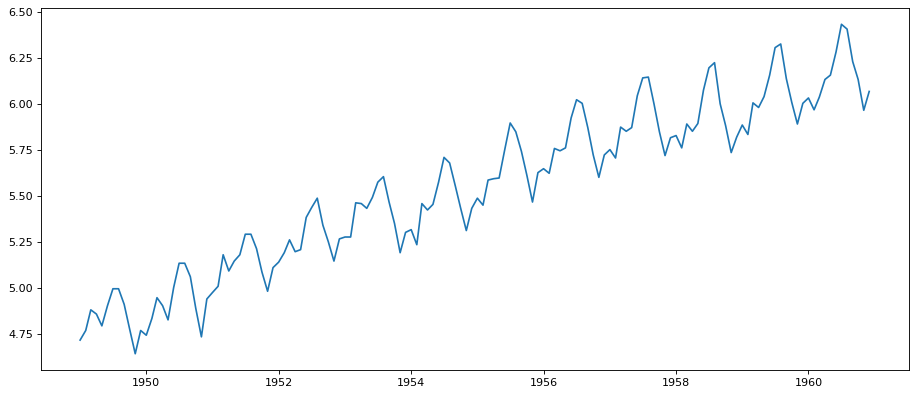

In [ ]:
import numpy as np
# Aplica a transformação de log nos dados
tlog = np.log(passengers)
figure(figsize=(14, 6), dpi=80)
plt.plot(tlog)

É possível observar que a tendência foi reduzida, mas ainda não foi eliminada completamente. Para melhor visualização, segue um gráfico comparativo dos dados originais e dos dados transformados.

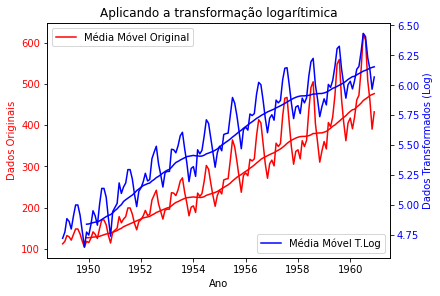

In [ ]:
fig, ax1 = plt.subplots(constrained_layout=True)

# Renderiza os dados originais
color = 'red'
ax1.set_xlabel('Ano')
ax1.set_ylabel('Dados Originais', color=color)
ax1.plot(passengers, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Média móvel: dados originais
original_mean = passengers.rolling(window=12).mean()
ax1.plot(original_mean, color=color, label='Média Móvel Original')

# Instancia um segundo eixo no gráfico
ax2 = ax1.twinx()

# Renderiza os dados com a transformação aplicada
color = 'blue'
ax2.set_ylabel('Dados Transformados (Log)', color=color)
ax2.plot(tlog, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()
plt.title('Aplicando a transformação logarítimica')

# Média móvel: dados transformados

tlog_mean = tlog.rolling(window=12).mean()
ax2.plot(tlog_mean, color=color,label='Média Móvel T.Log')

ax1.legend(loc='upper left')
ax2.legend(loc='lower right')

plt.show()

O mesmo comportamento pode ser obtido utilizando uma transformação de raiz quadrada ou cúbica Apesar de termos reduzido a tendência, ainda existe interferência, o que pede a aplicação de outras técnicas para estimá-la e removê-la da série. É possível aplicar três técnicas nesse momento:
- Agregação (***Aggregation***): removendo a média das médias de períodos específicos.
- Suavização (***Smoothing***): removendo as médias móveis.
- Treinamento Polinomial (***Polynomial Fitting***): treinar um modelo de regressão.

Para este problema será explicada apenas a Suavização.


#### 3.2.1.1. Suavização com média móvel


Para aplicar essa técnica, vamos utilizar a média móvel dos últimos 12 meses que já foi calculada e subtraí-la dos dados transformados.

In [ ]:
smoothing_diff = tlog - tlog_mean
smoothing_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

Nesse ponto é preciso estar atento a um detalhe. Como a média móvel utiliza uma janela prévia de X períodos, os X-1 períodos estarão presentes como **NaN** e deverão ser desconsiderados durante a validação de estado. Nesse caso, como consideramos 12 meses, os 11 primeiros meses estarão sem valor.

Após subtrair amédia móvel dos dados transformados podemos aplicar novamente os testes para verificar o estado estacionário da série.

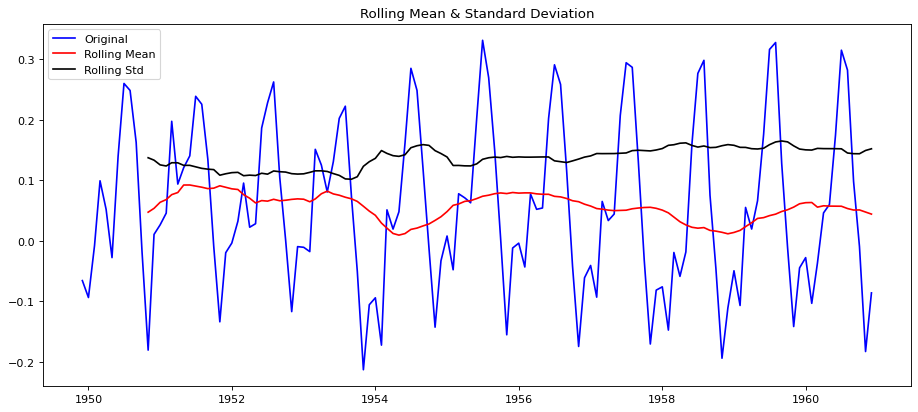


Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [ ]:
smoothing_diff.dropna(inplace=True)
test_stationarity(smoothing_diff)

Analisando os resultados dos testes, podemos visualizar uma pequena variação na média móvel mas sem uma tendência definida e os testes estatísticos rejeitaram a hipótese nula com 95% de confiança (teste estatístico menor que o valor crítico de 5%), confirmando que a série de fato é estacionária.

#### 3.2.1.1. Suavização com média móvel exponencialmente ponderada

Apesar da técnica acima apresentar uma melhora significativa, em cenários mais complexos não é possível definir claramente a janela de tempo ideal para se avaliar os períodos anteriores. Nesses casos é possível utilizar a média móvel ponderada, onde valores mais recentes têm um peso maior na média móvel.

Vamos aplicar essa técnica nos dados transformados e refazer as validações de estado. 

In [ ]:
tlog_weighted_mean = tlog.ewm(halflife=12).mean()
smoothing_weighted_diff = tlog - tlog_weighted_mean
smoothing_weighted_diff.head(12)

Month
1949-01-01    0.000000
1949-02-01    0.025339
1949-03-01    0.088967
1949-04-01    0.048028
1949-05-01   -0.012415
1949-06-01    0.078468
1949-07-01    0.141648
1949-08-01    0.120164
1949-09-01    0.030677
1949-10-01   -0.089698
1949-11-01   -0.197645
1949-12-01   -0.063342
Name: #Passengers, dtype: float64

Utilizando essa técnica, não temos a perda dos valores nos primeiros períodos. Além disso, o parâmetro ***halflife*** determina a redução exponencial do peso ao longo do tempo, não a janela temporal. Esse valor depende do domínio de uso e pode ser refinado até se chegar em um valor ótimo para o problema.

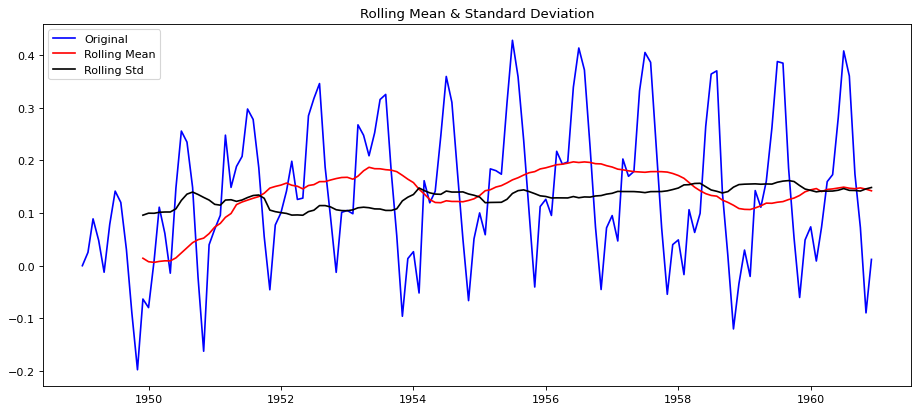


Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
test_stationarity(smoothing_weighted_diff)

Com essa nova técnica a nova base de dados apresentou uma menor variação na média móvel e variância e os testes estatísticos rejeitaram a hipótese nula com 99% de confiança, melhor que o primeiro valor obtido.

### 3.2.2. Eliminando a Tendência e Sazonalidade

A redução de tendencia não funciona completamente quando temos uma presença considerável de sazonalidade. Para remover a tendência em conjunto com a sazonalidade, duas técnicas podem ser aplicadas e serão explicadas a seguir:
- Diferenciação
- Decomposição 

#### 3.2.2.1. Diferenciação

É o método mais comum para lidar com os dois fatores, onde são observados os instantes anteriores de cada período de tempo. Para exemplificar, vamos calcular a diferenciação de primeira ordem na nossa base de dados transformada:

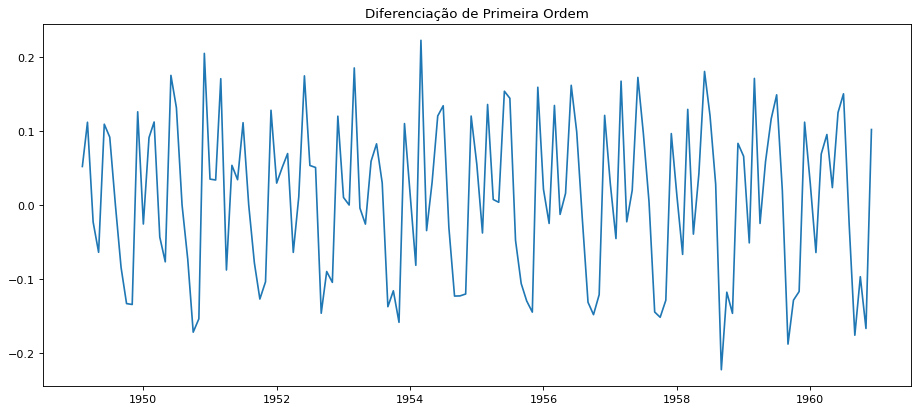

In [ ]:
# Diferenciação de primeira ordem
first_order_diff = tlog - tlog.shift()
figure(figsize=(14, 6), dpi=80)
plt.title('Diferenciação de Primeira Ordem')
plt.plot(first_order_diff)

Agora com a diferenciação calculada, vamos validar os testes de estado. Como estamos comparando cada instante com o instante anterior, no resultado, o primeiro valor será ***NaN***, por isso precisamos removê-lo da análise.

In [ ]:
first_order_diff

Month
1949-01-01         NaN
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
                ...   
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
Name: #Passengers, Length: 144, dtype: float64

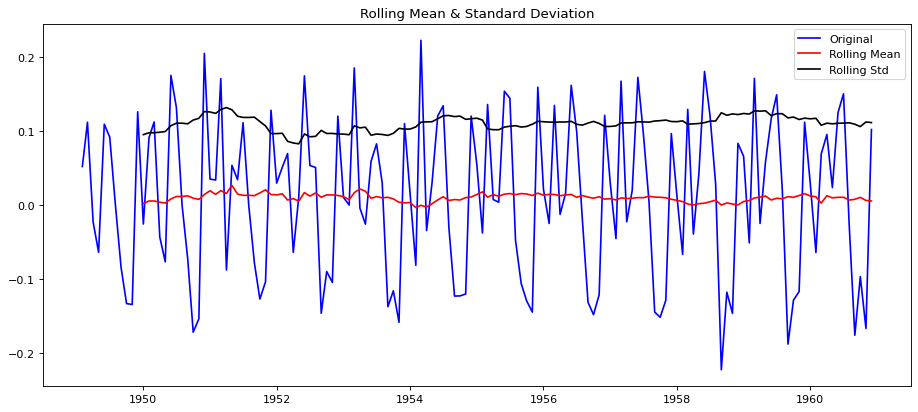


Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [ ]:
first_order_diff.dropna(inplace=True)
test_stationarity(first_order_diff)

Com essa técnica, conseguimos eliminar as variações mas o grau de confiança para rejeitar a hipótese nula foi de 90%. Nesse caso, para otimizar o grau estacionário, podemos utilizar diferenciações de segunda ou terceira ordens para se obter melhores resultados.

Para comparar com a validação anterior, vamos aplicar a diferenciação de segunda ordem, que consiste em considerar mais um instante anterior na comparação com o instante atual, deslocando a janela temporal uma vez mais.

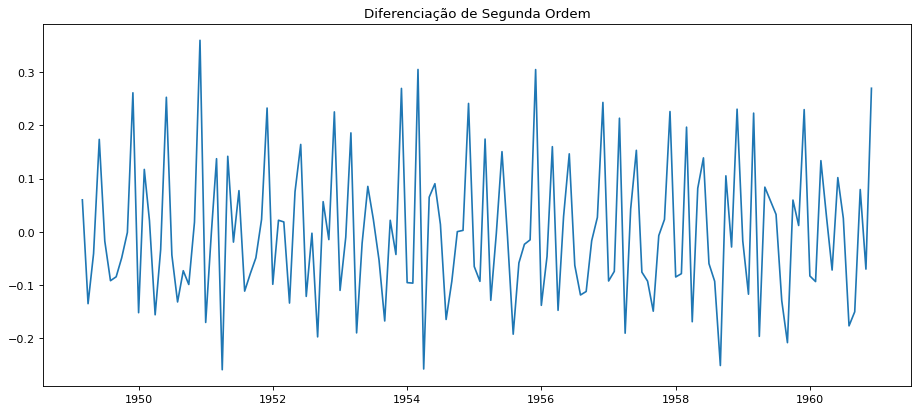

In [ ]:
# Diferenciação de segunda ordem
# Pode ser calculada utilizando a função shift com base na teoria 
# das diferenças finitas: https://en.wikipedia.org/wiki/Finite_difference
second_order_diff = tlog - 2*tlog.shift(1) + tlog.shift(2)

# Ou aplicando a função diff duas vezes seguidas
#second_order_diff = tlog.diff().diff()

figure(figsize=(14, 6), dpi=80)
plt.title('Diferenciação de Segunda Ordem')
plt.plot(second_order_diff)

In [ ]:
second_order_diff

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01    0.059932
1949-04-01   -0.135107
1949-05-01   -0.041032
                ...   
1960-08-01   -0.176733
1960-09-01   -0.150338
1960-10-01    0.079315
1960-11-01   -0.070168
1960-12-01    0.269530
Name: #Passengers, Length: 144, dtype: float64

Verificando os resultados obtidos na diferenciação de segunda ordem:

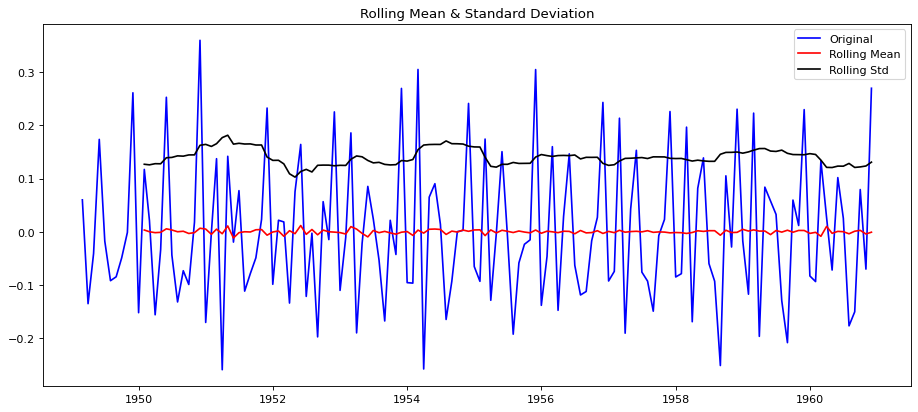


Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


In [ ]:
second_order_diff.dropna(inplace=True)
test_stationarity(second_order_diff)

Aplicando a diferenciação de segunda ordem para esse problema, obtivemos resultados muito melhores do que a primeira tentativa e qualquer outra técnica aplicada até agora. Com essa abordagem, os testes de estado apresentaram muito pouca varuação nas médias e variâncias e conseguiram rejeitar a hipótese nula com 99% de confiança

#### 3.2.2.2. Decomposição

Essa técnica consiste em decompor a base de dados nas variáveis estatísticas e utilizar os resíduos como uma série estacionária. Para fazer essa decomposição, vamos utilizar a função `seasonal_decompose` da biblioteca sazonal de modelagem estatística: `statsmodels.tsa.seasonal`.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(tlog)

Após aplicar a decomposiçã na nosa base transformada, vamos separar as partes de interesse:

In [ ]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

Com esses valores em mão podemos observar cada uma das variáveis estatísticas que medimos e verificar os dados residuais após remover os ruídos de cada parte decomposta da base original.

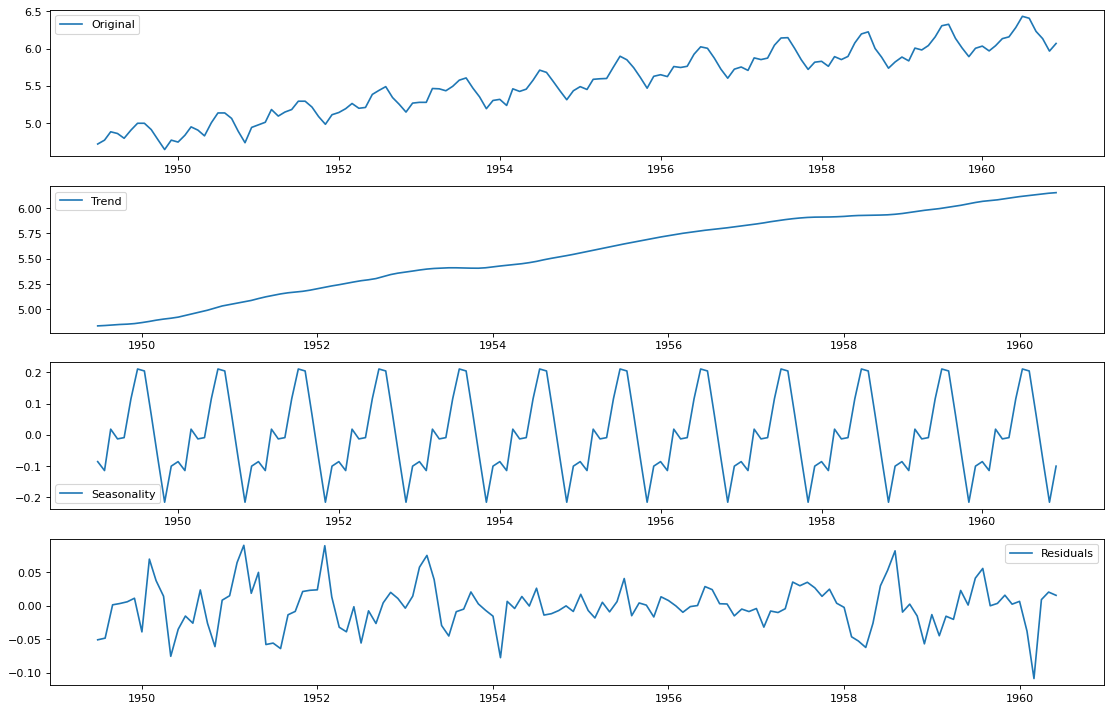

In [ ]:
figure(figsize=(14, 9), dpi=80)
plt.subplot(411)
plt.plot(tlog, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
# Verificando o resultado final obtido.
residual.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01   -0.050884
1949-08-01   -0.048415
1949-09-01    0.001223
1949-10-01    0.003156
1949-11-01    0.005749
1949-12-01    0.011045
Name: #Passengers, dtype: float64

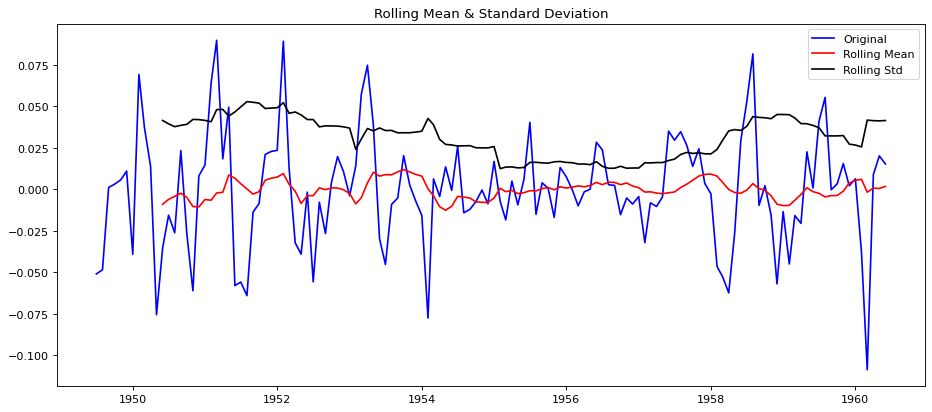


Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [ ]:
# Removendo os valores nulos para a análise
residual.dropna(inplace=True)
test_stationarity(residual)

Assim como a diferenciação de segunda ordem, obtivemos um resultado muito bom para os testes estatísticos, rejeitando a hipótese nula também com 99% de confiança. Apesar do mesmo nível de confiança, visivelente ainda existe uma variação maior na média e na variância.

Para essa técnica é preciso levar em consideração o momento em que os valores deverão ser convertidos novamente para os dados originais. Essa etapa pode se tornar muito complexa e pode ser útil apenas quando forem obtidos os melhores resultados para a transformação em uma série estacionária.

# 4. Predições em séries temporais

Para realizar predições com séries temporais após aplicar a técnica de diferenciação, podemos encontrar duas situações distintas. Uma em que não existem dependências entre os valores, onde é possível criar um modelo sem ruído nos resíduos, que representa uma série estritamente estacionária. 
A segunda situação possível apresenta uma dependência significativa entre os valores.

Nesse caso, a base de dados utilizada apresenta dependências entre os valores, uma vez que existe a presença de tendência e sazonalidade nos dados. Para lidar com essa situação, é preciso utilizar um modelo estatístico chamado ARIMA.

## 4.1. Criando um modelo ARIMA

A sigla ARIMA representa a integração de dois outros modelos existentes: AR (*Auto-regressive*) e MA (*Moving Average*). Sendo assim, ARIMA significa *Auto-Regressive Integrated Moving Average* e é uma regressão linear para predição de séries temporais estacionárias.

Esse modelo estatístico depende de algumas variáveis importantes, relacionadas a cada um dos modelos. Para compreender melhor como ele funciona é importante conhecer um pouco mais sobre esses parâmetros:
- **p**: Número de termos AR (Auto-regressivos)
- **q**: Número de termos MA (Moving Average)
- **d**: número de diferenças: quantidade de deslocamentos utilizados na técnica de diferenciação.

### 4.1.1. Identificando p (termos AR)

A variável p representa a quantidade de dependências utilizadas para prever um instante, a quantidade de dependências é definida pela quantidade de deslocamentos aplicados. Por exemplo, se p for 3, os preditores para x(t) serão x(t-1)...x(t-3).

Para determinar esse valor, podemos utilizar uma técnica de observação visual chamada ***Partial Autocorrelation Function* (PACF)**. Essa técnica mede a correlação entre a série temporal e sua versão deslocada temporalmente em X instantes anteriores. Nessa comparação as diferenças de deslocamentos anteriores não são considerdas, remnovendo os efeitos já explicados nos deslocamentos anteriores.

Vamos utilizar como base o resultado da diferenciação de primeira ordem:

In [ ]:
# Renderizando PACF
from statsmodels.tsa.stattools import pacf
lag_pacf = pacf(first_order_diff, nlags=20, method='ols')

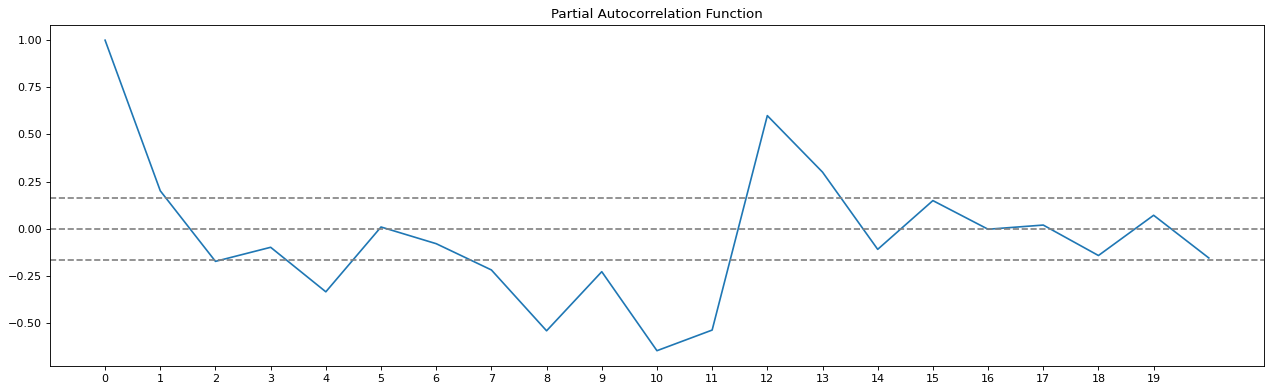

In [ ]:
#Plot PACF:
figure(figsize=(16, 5), dpi=80)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(first_order_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(first_order_diff)),linestyle='--',color='gray')
plt.xticks(list(range(0,20)))
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

As linhas tracejadas representam os intervalos de confiança. Para determinar o valor de p, observamos no gráfico o valor do deslocamento que cruza o maior intervalo de confiança pela primeira vez. Nesse caso: p = 2.


### 4.1.2. Identificando q (termos MA)

A variável q representa os erros na predição de cada deslocamento. Por exemplo, se q for 3, os preditores para x(t) serão e(t-1)...e(t-3), onde e(i) é a diferença entre a média móvel no instante i e o valor original.

Assim como o outro parâmetro, é possível estimá-lo através de uma observação visual, rederizando a ***Autocorrelation Function* (ACF)**, que mede a correlação entre a série e a sua própria versão temporalmente em X instantes anteriores.

In [ ]:
# Renderizando ACF
from statsmodels.tsa.stattools import acf
lag_acf = acf(first_order_diff, nlags=20)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Autocorrelation Function')

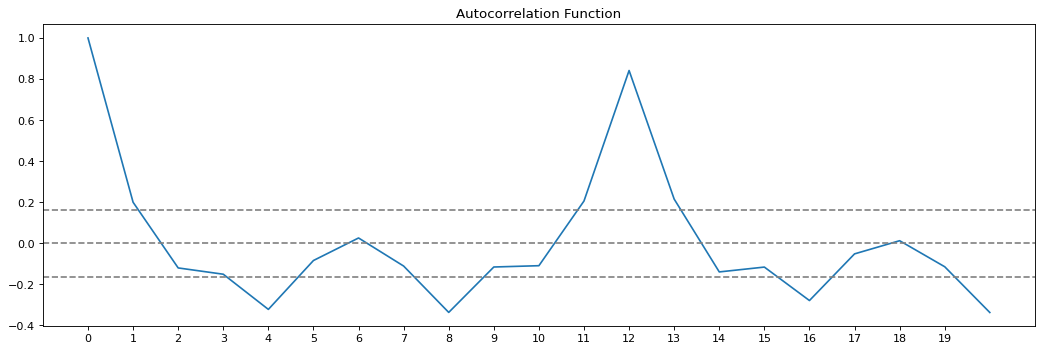

In [ ]:
#Plot ACF: 
figure(figsize=(16, 5), dpi=80)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(first_order_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(first_order_diff)),linestyle='--',color='gray')
plt.xticks(list(range(0,20)))
plt.title('Autocorrelation Function')

As linhas tracejadas também representam os intervalos de confiança. Para determinar o valor de q, também observamos no gráfico o valor do deslocamento que cruza o maior intervalo de confiança pela primeira vez. Nesse caso: q = 2.

### 4.1.3. Renderizando o modelo ARIMA

Para renderizar o modelo, é possível renderizá-los de forma independente e integrada. Para exemplificar, vamos observar os três modelos e comparar a métrica de performance **RSS (*Residual Sum Squares*)** entre eles.

In [ ]:
# Importando o modelo 
from statsmodels.tsa.arima_model import ARIMA

Rederizando o modelo AR:

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.5023')

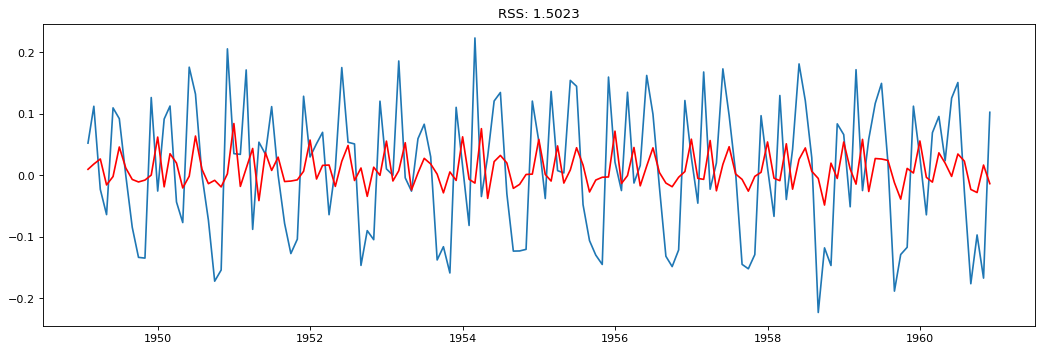

In [ ]:
model = ARIMA(tlog, order=(2, 1, 0))
results_AR = model.fit(disp=-1)  
figure(figsize=(16, 5), dpi=80)
plt.plot(first_order_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-first_order_diff)**2))

Rederizando o modelo MA:

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.4721')

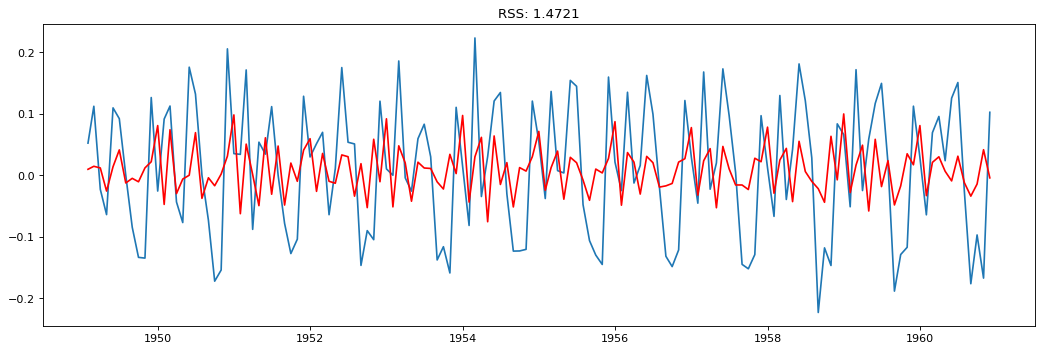

In [ ]:
model = ARIMA(tlog, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
figure(figsize=(16, 5), dpi=80)
plt.plot(first_order_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-first_order_diff)**2))

Renderizando o modelo integrado: ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

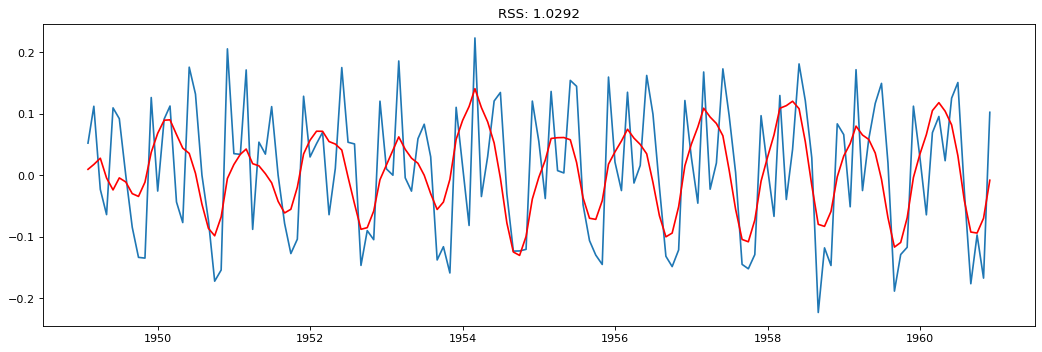

In [ ]:
model = ARIMA(tlog, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
figure(figsize=(16, 5), dpi=80)
plt.plot(first_order_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-first_order_diff)**2))

O modelo integrado apresenta uma métrica RSS muito melhor que os outros dois modelos isolados. Com esse modelo criado já é possível realizar predições na nossa série temporal.

## 4.2. Validando as Predições

Com o modelo pronto e realizando as predições, para validar o quão bom está o nosso modelo, a última etapa é voltar os dados para a escala original, antes de se aplicar a transformação logarítimica. Para isso vamos manter as predições em uma nova variável:

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


Para voltar à escala original, precisamos adicionar as diferenças entre os deslocamentos realizados consecutivamente ao número base. Para isso, determinamos a soma acumulativa de cada índice e adicionar ao número base. 

A soma acumulativa é obtida a seguir:

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


Após obter a soma acumulativa, adicionamos ao número base:

In [ ]:
predictions_ARIMA_log = pd.Series(tlog[0], index=tlog.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Após essa adição, já estamos com tudo preparado para aplicar o expoente e desfazer a transformação logarítimica:

Text(0.5, 1.0, 'RMSE: 90.1045')

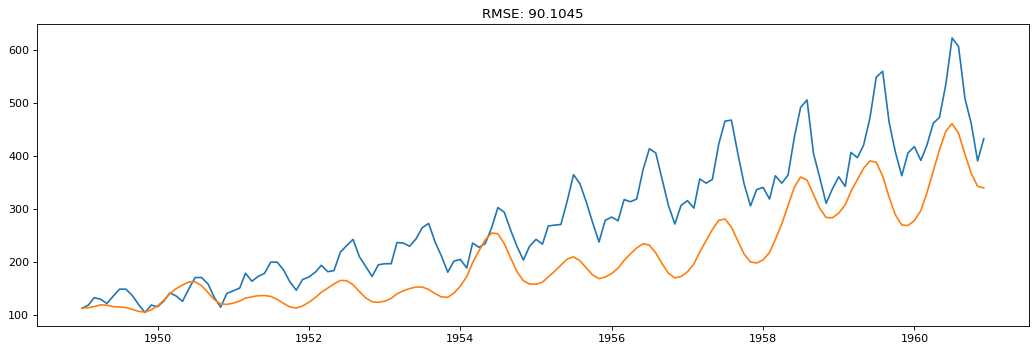

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
figure(figsize=(16, 5), dpi=80)
plt.plot(passengers)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-passengers)**2)/len(passengers)))

Aqui podemos observar o resultado visual das predições realizadas pelo modelo ARIMA. Podemos observar apesar dos erros, a tendência de acréscimo e a sazonalidade foram preservadas e levadas em consideração durante as predições do modelo.